In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nbodykit.lab import *

In [2]:
def a_ratio(z):
    # replace following with function of redshift
    delta_a = np.zeros(3)
    return 1 + delta_a

In [3]:
part_cat = Gadget1Catalog('snap_004.*')

print(part_cat)
print(part_cat.columns)
display(part_cat.attrs)

# rescale coordinates
z = part_cat.attrs['Redshift']
part_cat.attrs['BoxSize'] /= a_ratio(z) * 1000  # from kpc/h to Mpc/h
part_cat['Position'] /= a_ratio(z) * 1000

Gadget1Catalog(size=134217728, FileStack(Gadget1File(path=/mnt/home/yinli/99/snap_004.0, dataset=1, ncolumns=4, shape=(16900487,)>, ... 8 files))
['GadgetVelocity', 'ID', 'Mass', 'Position', 'Selection', 'Value', 'Weight']


/mnt/home/yinli/anaconda3/lib/python3.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `Mass`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/mnt/home/yinli/anaconda3/lib/python3.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `InternalEnergy`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/mnt/home/yinli/anaconda3/lib/python3.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `Density`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))
/mnt/home/yinli/anaconda3/lib/python3.7/site-packages/nbodykit/io/gadget.py:152: UserWarning: Cannot decide the item size of `SmoothingLength`, assuming 4 bytes.
  warnings.warn("Cannot decide the item size of `%s`, assuming 4 bytes." % (column))


{'Npart': array([       0, 16900487,        0,        0,        0,        0],
       dtype=uint32),
 'Massarr': array([ 0.        , 65.65609345,  0.        ,  0.        ,  0.        ,
         0.        ]),
 'Time': 0.9999999999999998,
 'Redshift': 2.220446049250313e-16,
 'FlagSfr': 0,
 'FlagFeedback': 0,
 'Nall': array([        0, 134217728,         0,         0,         0,         0],
       dtype=uint32),
 'FlagCooling': 0,
 'NumFiles': 8,
 'BoxSize': 1000000.0,
 'Omega0': 0.3175,
 'OmegaLambda': 0.6825,
 'HubbleParam': 0.6711,
 'FlagAge': 0,
 'FlagMetals': 0,
 'NallHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'flag_entr_ics': 0}

In [4]:
part_cat['Velocity'] = part_cat['GadgetVelocity'] * a_ratio(z) ** 1.5  # NOTE check if this is the correct conversion

part_cat.attrs['Nmesh'] = (1,) * part_cat['Position'].shape[1]  # HACK to make FOF compute the mean_separation

part_mass = part_cat['Mass'][0] * 1e10  # Msun/h

In [5]:
f = FOF(part_cat, 0.2, 16)
halo_cat = f.to_halos(part_mass, cosmology.Planck15, 0)  # NOTE check if this is the right cosmology

print(halo_cat)
print(halo_cat.columns)
display(halo_cat.attrs)

HaloCatalog(size=481398)
['Concentration', 'Mass', 'Position', 'Radius', 'Selection', 'Value', 'Velocity', 'VelocityOffset', 'Weight']


{'Npart': array([       0, 16900487,        0,        0,        0,        0],
       dtype=uint32),
 'Massarr': array([ 0.        , 65.65609345,  0.        ,  0.        ,  0.        ,
         0.        ]),
 'Time': 0.9999999999999998,
 'Redshift': 2.220446049250313e-16,
 'FlagSfr': 0,
 'FlagFeedback': 0,
 'Nall': array([        0, 134217728,         0,         0,         0,         0],
       dtype=uint32),
 'FlagCooling': 0,
 'NumFiles': 8,
 'BoxSize': array([1000., 1000., 1000.]),
 'Omega0': 0.3175,
 'OmegaLambda': 0.6825,
 'HubbleParam': 0.6711,
 'FlagAge': 0,
 'FlagMetals': 0,
 'NallHW': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'flag_entr_ics': 0,
 'Nmesh': (1, 1, 1),
 'linking_length': 0.2,
 'nmin': 16,
 'absolute': False,
 'periodic': True,
 'domain_factor': 1,
 'particle_mass': dask.array<mul, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>,
 'redshift': 0,
 'cosmo': {'output': 'vTk dTk mPk',
  'extra metric transfer functions': 'y',
  'h': 0.6774,
  'N_ur': 2.

/mnt/home/yinli/anaconda3/lib/python3.7/site-packages/dask/array/core.py:1334: FutureWarning: The `numpy.size` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  FutureWarning,


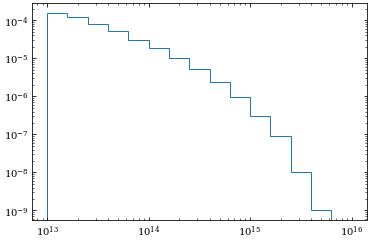

In [6]:
plt.hist(halo_cat['Mass'], bins=np.logspace(13, 16, 16),
         weights=np.full(halo_cat['Mass'].shape, 1 / halo_cat.attrs['BoxSize'].prod()),
         histtype='step')
plt.xscale('log')
plt.yscale('log')